<font color='blue'>Привет! Поздравляю с первым выполненным проектом. Проделана большая работа. Меня зовут Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.</font>

Привет, тезка! Спасибо что проверил мою работу и дал столько ценных комментариев. Постарался все учесть! )

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод
Данные о заемщиках содержат 21525 записей, значения которых распределены по 12 столбцам, которые отражают такие параметры как наличие детей, стаж работы, возраст, образование, семейный статус, пол, сведения о доходах и наличии долговой нагрузки а также цель получения кредита.

В столбцах 'days_employed' и 'total_income' содержатся пропуски.

<font color='green'>Данные загружены и предварительно изучены, отлично.</font>

### Шаг 2. Предобработка данных

<s><font color='brown'> Перед заполнением пропусков в столбце total_income можно еще подумать насчет их типа. Случайные ли это пропуски, или, вдруг, например, пропуски только у пенсионеров? (Можем взять срез с пропущенными строками и сравнить частоту появлений различных категорий клиентов в нем и в общем датасете.) Подсказка: можно использовать value_counts(normalize=True).  
    Также можно порассуждать насчет природы этих самых пропусков.

### Обработка пропусков

In [3]:
mask = df['days_employed'].isnull() #отфильтруем строки с пропущенными значениями
df[mask].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [4]:
len(df['days_employed'].unique()) #кол-во уникальных значений столбца 'days employed'

19352

In [5]:
len(df['total_income'].unique()) #кол-во уникальных значений столбца 'total_income'

19352

In [6]:
mask1 = df['total_income'].isnull()
df_miss = df[mask1]
df.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


In [7]:
df_miss['income_type'].value_counts(normalize = True)

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64

Большинство неуказавших доход не пенсионеры, а сотрудники неизвестных компаний

<b>UPD <font color=blue>Далее, мы можем сравнить это распределение с таковым в оригинальных данных:

In [8]:
#код ревьюера
df['income_type'].value_counts(normalize = True)

сотрудник          0.516562
компаньон          0.236237
пенсионер          0.179141
госслужащий        0.067782
предприниматель    0.000093
безработный        0.000093
студент            0.000046
в декрете          0.000046
Name: income_type, dtype: float64

<b>UPD <font color=blue>Делаем вывод, что распределения типов занятости в данных с пропусками не отличается, то есть пропуски случайны.

In [8]:
df['days_employed'].mean() #определим среднее значение столбца 'days_employed'

63046.49766147338

In [9]:
days_employed_median = df['days_employed'].median() #определим медиану столбца 'days_employed'
days_employed_median

-1203.369528770489

In [10]:
total_income_mean = df['total_income'].mean() #среднее столбца 'total_income'
total_income_mean

167422.30220817294

In [11]:
df['total_income'].median() #медиана столбца 'total_income'

145017.93753253992

In [12]:
df['days_employed'] = df['days_employed'].fillna(value = days_employed_median) #заполняем пропущенные значения столбца 'days_employed' медианой

<s><font color='brown'>Мы заполняем пропуски отрицательным стажем. Есть ли в этом какой-то смысл? Стоит либо разобраться с проблемой, либо не трогать не нужный для анализа столбец.
    

Согласен, лучше не трогать этот столбец

In [13]:
df['total_income'] = df['total_income'].fillna(value = total_income_mean) #заполняем пропущенные значения столбца 'total_income' средним значением

<font color=green>Молодец, что стараешься оптимально заполнить пропуски исходя их имеющихся данных.

<font color='brown'>Однако здесь можно пойти дальше и попробовать заполнить пропуски медианами по роду деятельности: пенсионеров - медианами пенсионеров, сотрудников - медианами сотрудников. Так заполнение пропусков будет еще лучше.

Учту на будущее!

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод
Обнаруженные пропущенные значения в столбце со стажем ('days_employed') были заменены на медиану, как более характерное значение для данного параметра.

Возможная причина появления пропущенных данных - человеческий фактор: при заполнении анкеты данные поля не были заполнены.

Пропущенные значения в столбце с доходом ('total_income') были заменены на среднее значение (различия между средним значением и медианой в данном случае было несущественным).

<font color='green'>Пропуски обнаружены и обработаны.

### Замена типа данных

In [15]:
df['days_employed'] = df['days_employed'].astype('int') #заменим вещественный тип данных в столбце 'days_employed' на целочисленный

In [16]:
df['total_income'] = df['total_income'].astype('int') #аналогично для столбца 'total_income'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Вывод
Вещественный тип значений в столбцах 'days_employed' и 'total_income' был заменен на целочисленный.

Для преобразования в целые числа, к указанным столбцам был применен метод astype() с аргументом int в связи с тем, что количество дней стажа обычно учитываются в целых числах, а для оценки общего дохода клиента важна только целочисленная составляющая.

<font color='green'>Согласен с тобой, дробные части дней стажа и копейки в уровнях дохода нас не интересуют.

### Обработка дубликатов

In [18]:
df.duplicated().sum() #посмотрим количество дубликатов-строк

54

In [19]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [20]:
df['education'] = df['education'].str.lower()

In [21]:
df.duplicated().sum()

71

Да, после того как в столбце education все значения привел к нижнему регистру, появились новые дубликаты

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
children            21454 non-null int64
days_employed       21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null int64
purpose             21454 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### Вывод
Были выявлены и удалены 71 дубликат строк в таблице.

Для выявления строк-дубликатов к DataFrame был применен метод duplicated() и подсчитано количество методом sum().
Кроме того, значения столбца education были приведены к нижнему регистру, что выявило дополнительные дубликаты.

Для удаления строк-дублткатов к DataFrame был применен метод drop_duplicates() c параметром inplace = True для сохранения DataFrame без строк-дубликатов.

Возможная причина появления дубликатов: пользователями были несколько раз отправлены идентичные данные, пользователями были введены идентичные данные с использованием прописных и строчных букв.

<s><font color='red'>Обрати внимание на столбец с образованием. В нем есть проблемы, после устранения которых могут возникнуть новые дубликаты.

Да, спасибо за подсказку, исправил!

### Лемматизация

In [24]:
from pymystem3 import Mystem #импортируем библиотеку PyMystem
m = Mystem()

In [25]:
df.head() #посмотрим на нашу таблицу еще разок

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [26]:
text = df['purpose']
text_string = text.str.cat(sep=' ') #преобразуем Series в string с пробелами в качестве разделителя

In [27]:
lemmas = m.lemmatize(text_string)

In [28]:
from collections import Counter #импортируем счетчик
c = Counter(lemmas)
c.most_common() #посмотрим наиболее часто встречающиеся леммы

[(' ', 55023),
 ('недвижимость', 6351),
 ('покупка', 5897),
 ('жилье', 4460),
 ('автомобиль', 4306),
 ('образование', 4013),
 ('с', 2918),
 ('операция', 2604),
 ('свадьба', 2324),
 ('свой', 2230),
 ('на', 2222),
 ('строительство', 1878),
 ('высокий', 1374),
 ('получение', 1314),
 ('коммерческий', 1311),
 ('для', 1289),
 ('жилой', 1230),
 ('сделка', 941),
 ('дополнительный', 906),
 ('заниматься', 904),
 ('подержать', 853),
 ('проведение', 768),
 ('сыграть', 765),
 ('сдача', 651),
 ('семья', 638),
 ('собственный', 635),
 ('со', 627),
 ('ремонт', 607),
 ('приобретение', 461),
 ('профильный', 436),
 ('подержанный', 111),
 ('\n', 1)]

<font color='green'>Автоматический поиск популярных лемм, супер!

In [29]:
def lemma_purpose(text): #функция лемматизации текста в столбце с целями кредита
    lemmas = m.lemmatize(text)
    return lemmas   

In [30]:
df['lemma_purpose'] = df['purpose'].apply(lemma_purpose) #добавим столбец с леммами целей кредита

In [31]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemma_purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


### Вывод
Лемматизация столбца с целью получения кредита показывает, что наиболее популярными целями являются:
* покупка недвижимости
* покупка автомобиля
* образование
* операция
* свадьба (2335 значений !!!) *покажите мне людей которые берут кредиты на свадьбу!*
* строительство

<font color=blue>Оо, а еще есть кредиты на отпуск O_o

### Категоризация данных

In [32]:
def purpose_cat(data): #функция возвращает категорию цели кредита в зависимости от встречающихся слов
    if ('недвижимость' in data) or ('жилье' in data):
        return 'недвижимость'
    if 'автомобиль' in data:
        return 'авто'
    if 'образование' in data:
        return 'образование'
    if 'операция' in data:
        return 'операция'
    if 'свадьба' in data:
        return 'свадьба'
    if 'строительство' in data:
        return 'строительство'
    return 'другое'

df['purpose_category'] = df['lemma_purpose'].apply(purpose_cat) #добавляем к таблице новый столбец с категориями целей кредита

In [33]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemma_purpose,purpose_category
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",авто
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,"[покупка, , жилье, \n]",недвижимость
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,"[операция, , с, , жилье, \n]",недвижимость
7,0,-152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,"[образование, \n]",образование
8,2,-6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,"[на, , проведение, , свадьба, \n]",свадьба
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,"[покупка, , жилье, , для, , семья, \n]",недвижимость


In [34]:
df['purpose_category'].value_counts().head(10)

недвижимость    10811
авто             4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

### Вывод

Во-первых категорирование целей кредита с помощью лемм выявило то, что отдельных целей "операция" и "строительство" - нет, все цели укладываются в категории:
* недвижимость
* авто
* образование
* свадьба

Во-вторых, удивительно что категория "другое" отсутствует!

На данном этапе категоризированы цели кредита, для дальнейших ответов на вопросы будут категоризированы данные в столбцах с семейным положением, уровнем дохода.

<font color='green'>Безусловно, отлично справился. Это одно из сложных заданий проекта.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [35]:
df['debt'].value_counts()

0    19713
1     1741
Name: debt, dtype: int64

In [36]:
df['debt'].mean()

0.08115036822970076

In [37]:
df['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [56]:
def child_order(data2):
    if data2 == 0:
        return 0
    if data2 == 1:
        return 1
    if data2 == 2:
        return 2
    if data2 == 3:
        return 3
    if data2 == 4:
        return 4
    return 0
df['children'] = df['children'].apply(child_order)

In [57]:
df['children'].value_counts()

0    14223
1     4808
2     2052
3      330
4       41
Name: children, dtype: int64

In [58]:
df.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
0,14223,0.075371
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561


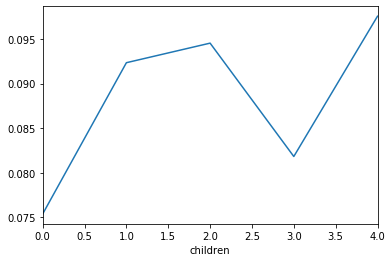

In [59]:
df.groupby('children')['debt'].mean().plot()

### Вывод

## У бездетных самая маленькая просрочка (7%), у клиентов с детьми незначительно выше процент просрочки (порядка 9,5%)

<font color='green'>Отличное использование `groupby`!

<font color='brown'>Однако предлагаю вовсе исключить из анализа пятидетных клиентов ввиду их малого количества. Возможно, тогда мы увидим тенденции.

Пятидетных исключил, теперь можно сказать, что у бездетных просрочка ниже. С ростом количества детей растет просрочка. :)

<b>UPD <font color=green>Все так, дети - удовольствие не из дешевых.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [42]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [43]:
def family_category(data3):
    if (data3 == 'женат / замужем') or (data3 == 'гражданский брак'):
        return 'семья'
    return 'нет семьи'
df['family_cat'] = df['family_status'].apply(family_category)

In [44]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemma_purpose,purpose_category,family_cat
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,семья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",авто,семья
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,семья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,семья
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,семья


In [45]:
df.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
Не женат / не замужем,2810,0.097509
в разводе,1195,0.071130
вдовец / вдова,959,0.065693
гражданский брак,4151,0.093471
женат / замужем,12339,0.075452


In [46]:
df['family_cat'].value_counts()

семья        16490
нет семьи     4964
Name: family_cat, dtype: int64

In [47]:
df.groupby('family_cat')['debt'].agg(['count','mean'])

,count,mean
family_cat,,
нет семьи,4964,0.085012
семья,16490,0.079988


In [60]:
def family_category2(data4):
    if (data4 == 'Не женат / не замужем'):
        return 'не состоял в семейных отношениях'
    return 'состоял/состоит в семейных отношениях'
df['family_cat2'] = df['family_status'].apply(family_category2)

In [61]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemma_purpose,purpose_category,family_cat,income_cat,family_cat2
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,семья,"(250000, 500000]",состоял/состоит в семейных отношениях
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",авто,семья,"(100000, 150000]",состоял/состоит в семейных отношениях
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,семья,"(100000, 150000]",состоял/состоит в семейных отношениях
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,семья,"(250000, 500000]",состоял/состоит в семейных отношениях
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,семья,"(150000, 250000]",состоял/состоит в семейных отношениях


In [62]:
df.pivot_table(index='family_cat2',
              values=['debt'],
               aggfunc=['count','mean'])

,count,mean
,debt,debt
family_cat2,,
не состоял в семейных отношениях,2810,0.097509
состоял/состоит в семейных отношениях,18644,0.078685


### У тех кто состоял/состоит в семейных отношениях просрочек меньше на 2%

### Вывод

## У семейных людей меньше просрочек по кредитам, разница составляет около 1%, а также, у людей не состоявших в семейных отношениях на 2% больше просрочек

<s><font color='brown'>Еще предлагаю пробить категории "состоял/состоит в семейных отношениях" и "не состоял в семейных отношениях"

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [48]:
df['total_income'].sort_values()

14585      20667
13006      21205
16174      21367
1598       21695
14276      21895
          ...   
17178    1711309
20809    1715018
9169     1726276
19606    2200852
12412    2265604
Name: total_income, Length: 21454, dtype: int64

In [49]:
df['income_cat'] = pd.cut(df['total_income'],[20000, 70000, 100000, 150000, 250000, 500000, 3000000])

In [50]:
df['income_cat'].value_counts()

(150000, 250000]     8475
(100000, 150000]     5704
(70000, 100000]      2989
(250000, 500000]     2590
(20000, 70000]       1474
(500000, 3000000]     222
Name: income_cat, dtype: int64

<font color=brown>Хотелось бы увидеть какое-то обоснование выбора границ доходов.

<font color='blue'>Когда не вполне очевидно, как разбить сет, можно воспользоваться квантилями (как медиана, только бьет данные не на две, а на произвольное количество равных частей), чтобы в каждой группе было равное количество людей. Тут поможет, например, метод describe, примененный к столбцу, или непосредственно DataFrame.quantile.

Честно говоря, не очень разобрался с quantile()...(

In [78]:
df['total_income'].describe()

count    2.145400e+04
mean     1.674218e+05
std      9.779436e+04
min      2.066700e+04
25%      1.076230e+05
50%      1.560435e+05
75%      1.958132e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [87]:
df['total_income'].quantile(q=0.25)

107623.0

<b>UPD <font color=blue>107 000 - это отметка, ниже которой доходы у 25% всех клиентов, 156 000 - ниже которой у половины (то етсь медиана) и т.д.

In [80]:
df['income_cat'] = pd.cut(df['total_income'],[0, 100000, 150000, 200000, 3000000])
df['income_cat'].value_counts()

(150000, 200000]     6221
(100000, 150000]     5704
(200000, 3000000]    5066
(0, 100000]          4463
Name: income_cat, dtype: int64

In [81]:
df.pivot_table(index='income_cat',
              values=['debt'],
               aggfunc=['count','mean'])

,count,mean
,debt,debt
income_cat,,
"(0, 100000]",4463,0.079319
"(100000, 150000]",5704,0.086080
"(150000, 200000]",6221,0.086481
"(200000, 3000000]",5066,0.070667


## После более равномерной категоризации: у заемщиков с доходом до 100000 просрочка 8%, что на 0,5% меньше чем у заемщиков с доходом от 100000 до 200000. У заемщиков с доходом больше 200000 просрочка еще меньше, она составляет 7%.

In [82]:
#df.groupby('income_cat')['debt'].agg(['count','mean'])

In [84]:
#df.groupby('income_cat')['debt'].mean().plot()

### Вывод

## Категории заемщиков с самым маленьким и самым большим доходом более дисциплинированные плательщики по кредитам

- Как разные цели кредита влияют на его возврат в срок?

In [53]:
df['purpose_category'].value_counts()

недвижимость    10811
авто             4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

In [54]:
df.groupby('purpose_category')['debt'].agg(['count','mean'])

,count,mean
purpose_category,,
авто,4306,0.093590
недвижимость,10811,0.072334
образование,4013,0.092200
свадьба,2324,0.080034


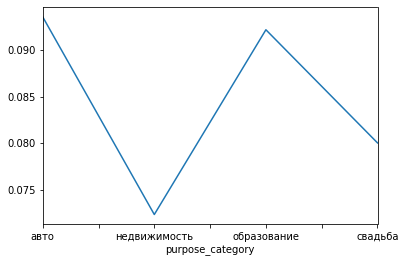

In [55]:
df.groupby('purpose_category')['debt'].mean().plot()

### Вывод

## Просрочка выше по автокредитам и кредитам на образование (9%). Самая низкая просрочка по кредитам на недвижимость (7%), чуть выше по кредитам на свадьбу (8%).

<font color='green'>В целом, все хорошо. Верные цифры, лаконичный код, четкие и правильные выводы.

<s><font color='red'>Однако одной из целей этой работы является отработка применения сводных таблиц. Это гибкий и удобный способ, развитие метода `groupby()`. Разобравшись с `groupby()` применительно к нашему заданию, давай сделаем еще шаг вперед и применим `pivot_table()`. Подсказка: здесь можно не указывать аргумент `columns` - тогда мы получим одномерную табличку, как в случае с `groupby()`.

In [85]:
df.pivot_table(index='purpose_category',
              values=['debt'],
               aggfunc=['count','mean'])

,count,mean
,debt,debt
purpose_category,,
авто,4306,0.093590
недвижимость,10811,0.072334
образование,4013,0.092200
свадьба,2324,0.080034


### Done!

<b>UPD <font color=green>👍👏

### Шаг 4. Общий вывод

## В целом по кредитному портфелю процент просроченных кредитов небольшой, порядка 8%, что свидетельствует о довольно высоком качестве портфеля.
## У бездетных самая маленькая просрочка (7%), у клиентов с детьми незначительно выше процент просрочки (порядка 9,5%)
## У семейных людей меньше просрочек по кредитам, разница составляет около 1%, а также, у людей не состоявших в семейных отношениях на 2% больше просрочек
##  У заемщиков с доходом до 100000 просрочка 8%, что на 0,5% меньше чем у заемщиков с доходом от 100000 до 200000. У заемщиков с доходом больше 200000 просрочка еще меньше, она составляет 7%
## Просрочка выше по автокредитам и кредитам на образование (9%). Самая низкая просрочка по кредитам на недвижимость (7%), чуть выше по кредитам на свадьбу (8%)

<s><font color='brown'>Молодец, что в общем выводе ты даешь четкий бизнес совет клиенту - кто для него хороший клиент, кто плохой. Но хорошо бы еще добавить цифр для заказчика, а также призываю пересмотреть ситуацию по детям.

<font color='blue'>Итак, отличная работа, особенно для первого проекта. Ты показываешь прекрасное владение изучаемым материалом: уверенно пользуешься pandas, умеешь подготавливать, очищать, обогощать данные. Также ты правильно разбил их на категории и проанализировал результаты.  Отдельно отмечу отличную реализацию лемматизации и вледение методами аггрегации.  
    Однако некоторые замечания у меня все же есть, уверен, учесть их тебе не составит труда. Жду доработанный проект, успехов!

<b>UPD: <font color='blue'>Хорошая доработка и отличный старт выполнения проектов. Впереди еще много интересных исследований. Успехов в дальнейшем прохождении курса!

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.